<a href="https://colab.research.google.com/github/quvyshnav/Data-Analysis/blob/main/Samsung_mobile_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/datatechexplorer/samsung-mobile-sales-dataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: quvyshnav
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/datatechexplorer/samsung-mobile-sales-dataset


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import os
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('./samsung-mobile-sales-dataset/Expanded_Dataset.csv')
df.head()

,Year,Quarter,Product Model,5G Capability,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%),Region
0,2019,Q1,Galaxy S10,No,26396,4.212951e+06,1.04,57.36,39.55,293.10,55.87,Asia-Pacific
1,2019,Q1,Galaxy Note10,No,25671,7.240266e+06,2.82,85.80,42.58,67.46,37.26,Latin America
2,2019,Q1,Galaxy S20,No,16573,2.560833e+07,-0.03,47.02,3.78,77.25,84.66,Middle East & Africa
3,2019,Q1,Galaxy Note20,No,7177,2.198442e+07,0.84,25.70,23.41,105.27,40.03,North America
4,2019,Q1,Galaxy S21,No,45633,1.634244e+07,2.36,89.13,44.43,206.17,76.88,Latin America


In [14]:
column = df.columns

In [8]:
df.shape

(1000, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1000 non-null   int64  
 1   Quarter                    1000 non-null   object 
 2   Product Model              1000 non-null   object 
 3   5G Capability              1000 non-null   object 
 4   Units Sold                 1000 non-null   int64  
 5   Revenue ($)                1000 non-null   float64
 6   Market Share (%)           1000 non-null   float64
 7   Regional 5G Coverage (%)   1000 non-null   float64
 8   5G Subscribers (millions)  1000 non-null   float64
 9   Avg 5G Speed (Mbps)        1000 non-null   float64
 10  Preference for 5G (%)      1000 non-null   float64
 11  Region                     1000 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 93.9+ KB


In [10]:
df.describe()

,Year,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%)
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2021.456000,32842.990000,3.019733e+07,3.723570,66.889720,30.152080,179.225560,67.14291
std,1.700281,16039.770572,1.837941e+07,1.991108,19.254095,14.537781,70.470934,15.75925
min,2019.000000,5309.000000,2.987436e+06,-0.490000,25.340000,-0.890000,50.370000,37.14000
25%,2020.000000,19327.250000,1.460749e+07,2.635000,50.400000,18.412500,120.410000,53.26750
50%,2021.000000,33689.000000,2.801200e+07,3.760000,67.050000,29.915000,177.390000,66.96000
75%,2023.000000,43911.000000,4.180391e+07,5.282500,83.210000,44.360000,238.860000,80.99000
max,2024.000000,64883.000000,8.426494e+07,6.950000,103.920000,54.940000,298.700000,94.84000


In [11]:
df.isnull().sum()

,0
Year,0
Quarter,0
Product Model,0
5G Capability,0
Units Sold,0
Revenue ($),0
Market Share (%),0
Regional 5G Coverage (%),0
5G Subscribers (millions),0
Avg 5G Speed (Mbps),0


In [12]:
df.select_dtypes(include=[np.number])

,Year,Units Sold,Revenue ($),Market Share (%),Regional 5G Coverage (%),5G Subscribers (millions),Avg 5G Speed (Mbps),Preference for 5G (%)
0,2019,26396,4.212951e+06,1.04,57.36,39.55,293.10,55.87
1,2019,25671,7.240266e+06,2.82,85.80,42.58,67.46,37.26
2,2019,16573,2.560833e+07,-0.03,47.02,3.78,77.25,84.66
3,2019,7177,2.198442e+07,0.84,25.70,23.41,105.27,40.03
4,2019,45633,1.634244e+07,2.36,89.13,44.43,206.17,76.88
...,...,...,...,...,...,...,...,...
995,2023,36216,2.995937e+07,3.82,70.59,46.92,177.43,63.86
996,2022,33806,2.369938e+07,-0.23,77.31,47.51,129.70,78.41
997,2022,23678,2.330203e+07,0.58,45.61,43.79,156.56,72.06
998,2023,35697,1.946256e+07,2.49,36.55,36.44,236.39,47.11


In [13]:
# Categoric columns
object_col = [col for col in df.columns if df[col].dtype == "object"]
object_col

['Quarter', 'Product Model', '5G Capability', 'Region']

In [15]:
num_col = [col for col in column if col not in object_col]
num_col

['Year',
 'Units Sold',
 'Revenue ($)',
 'Market Share (%)',
 'Regional 5G Coverage (%)',
 '5G Subscribers (millions)',
 'Avg 5G Speed (Mbps)',
 'Preference for 5G (%)']

In [17]:
# Compute cardinality (number of unique values for each categorical column)

cardinality = {col: df[col].nunique() for col in object_col}
cardinality

{'Quarter': 4, 'Product Model': 15, '5G Capability': 2, 'Region': 5}

In [19]:
cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Column', 'Cardinality'])
cardinality_df

,Column,Cardinality
0,Quarter,4
1,Product Model,15
2,5G Capability,2
3,Region,5


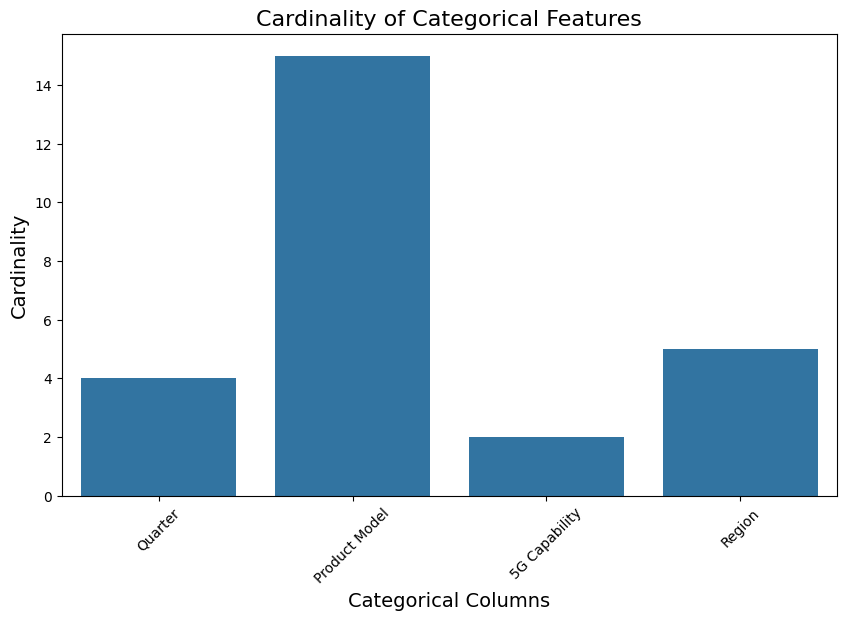

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cardinality_df['Column'], y=cardinality_df['Cardinality'])
plt.xlabel("Categorical Columns", fontsize=14)
plt.ylabel("Cardinality", fontsize=14)
plt.title("Cardinality of Categorical Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()

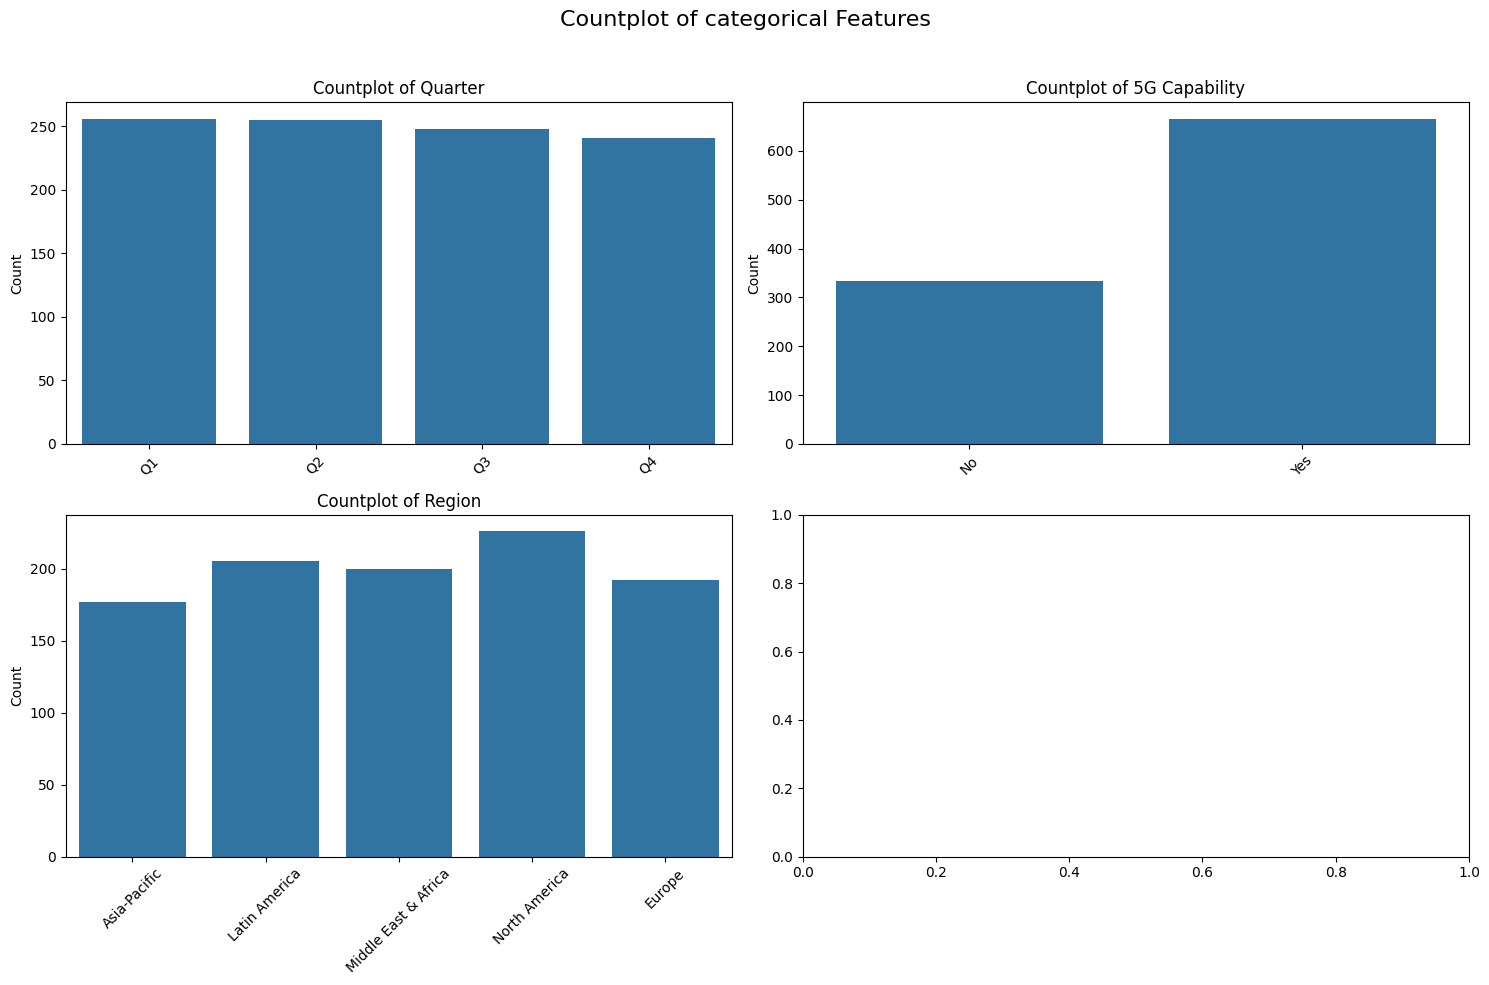

In [23]:
# Countplot visualization for categorical variables

high_card = []
low_card = []

for col in object_col:
  if df[col].nunique() > 10:
    high_card.append(col)
  else:
    low_card.append(col)

fig,axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle("Countplot of categorical Features", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(low_card):
  sns.countplot(data=df,x=col,ax=axes[i])
  axes[i].set_title(f"Countplot of {col}", fontsize=12)
  axes[i].set_xlabel("")
  axes[i].set_ylabel("Count")
  axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

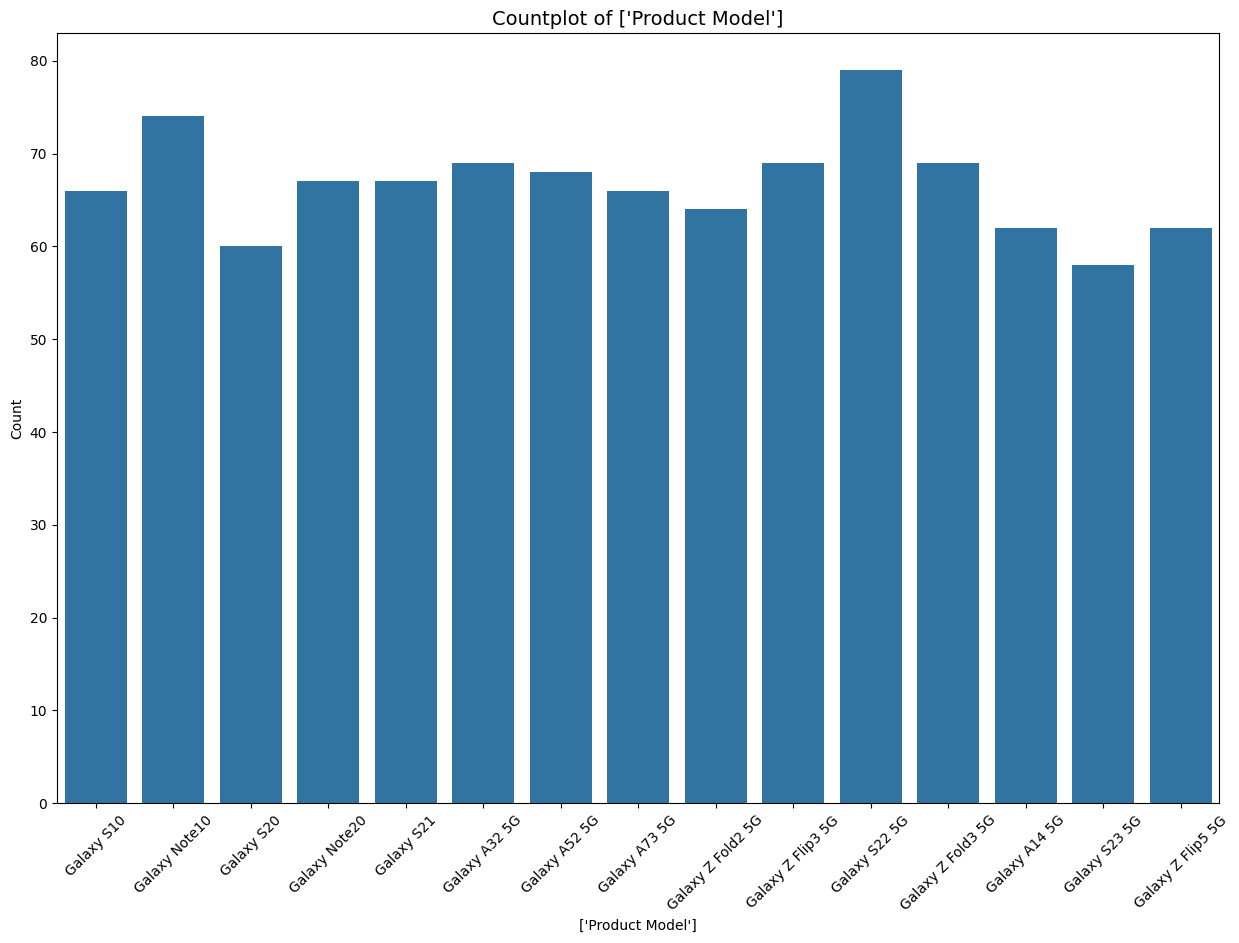

In [25]:
if high_card:
  plt.figure(figsize=(15, 10))
  sns.countplot(data=df, x=high_card[0])
  plt.title(f"Countplot of {high_card}",fontsize=14)
  plt.xlabel(high_card)
  plt.ylabel("Count")
  plt.xticks(rotation=45)
  plt.show()

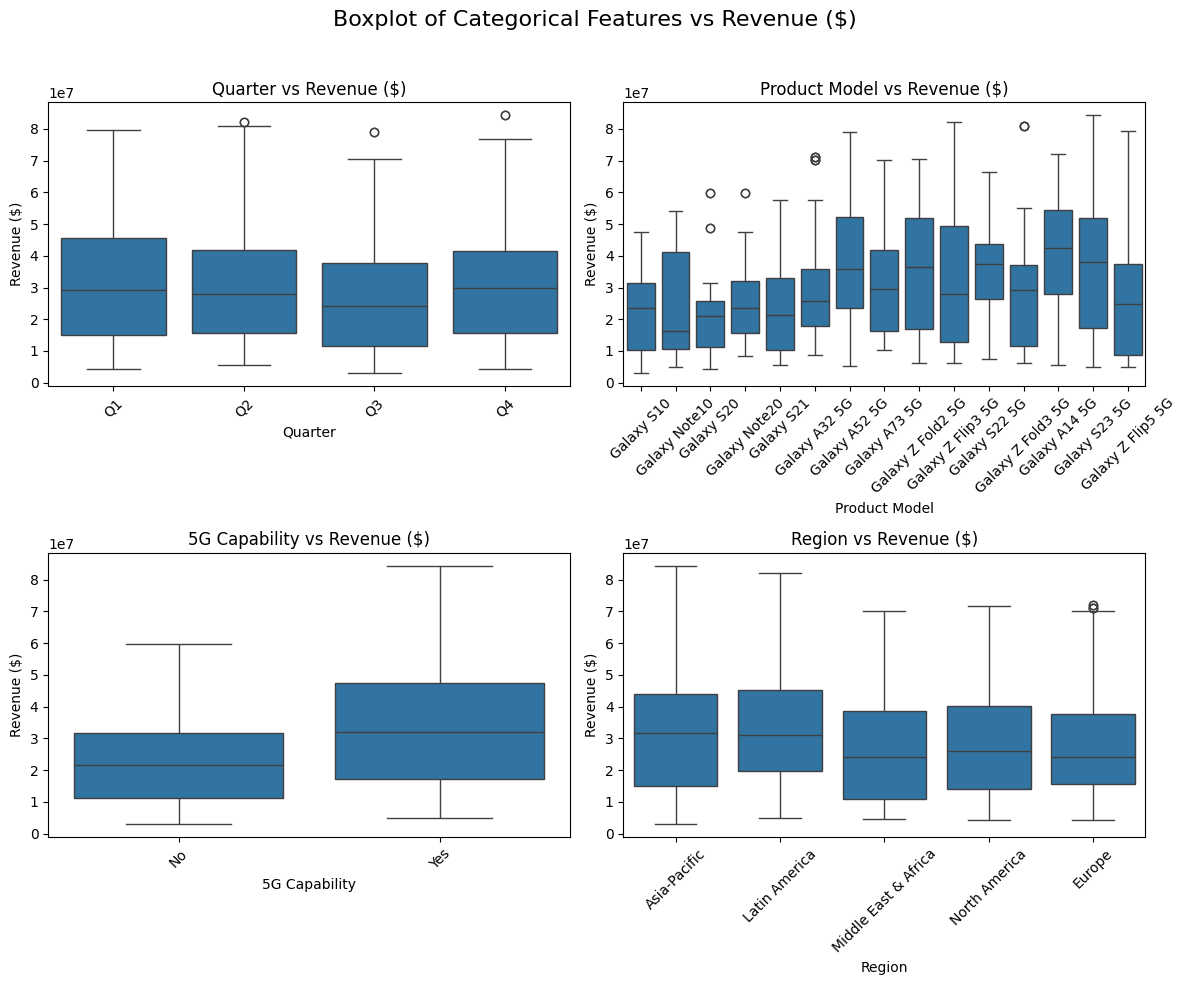

In [26]:
# Boxplot visualization for categorical features vs. Revenue ($)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Boxplot of Categorical Features vs Revenue ($)", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(object_col):
    sns.boxplot(x=df[col], y=df["Revenue ($)"], ax=axes[i])
    axes[i].set_title(f"{col} vs Revenue ($)", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Revenue ($)")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

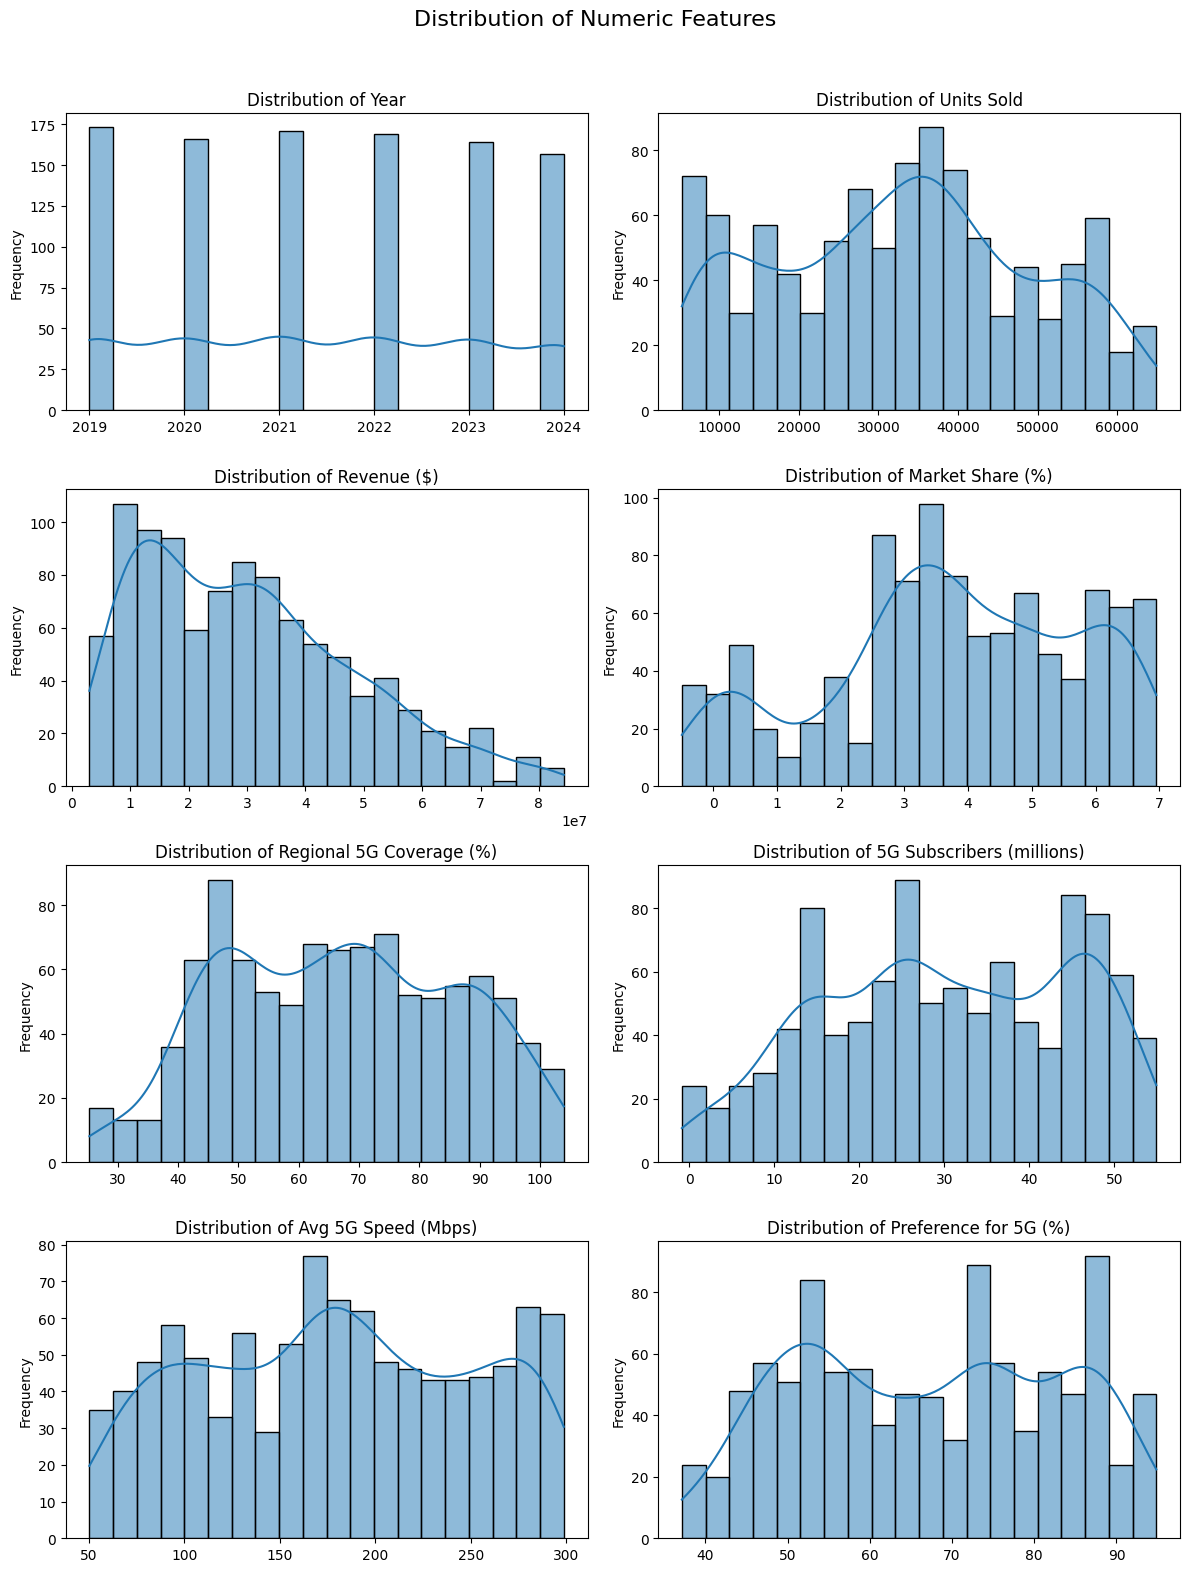

In [29]:
# Create a 4x2 subplot for numeric column distributions

fig, axes = plt.subplots(4,2,figsize=(12,16))
fig.suptitle("Distribution of Numeric Features", fontsize=16)

# Flatten the axes array for easier iteration

axes = axes.flatten()

for i,col in enumerate(num_col):
  sns.histplot(data=df[col], bins=20, kde=True, ax=axes[i])
  axes[i].set_title(f"Distribution of {col}", fontsize=12)
  axes[i].set_xlabel("")
  axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [31]:
# Check normality using Shapiro-Wilk test
normality_results = {}
for col in num_col:
    stat, p_value = shapiro(df[col])
    normality_results[col] = "Normal Distribution" if p_value > 0.05 else "Not Normal Distribution"

normality_results

{'Year': 'Not Normal Distribution',
 'Units Sold': 'Not Normal Distribution',
 'Revenue ($)': 'Not Normal Distribution',
 'Market Share (%)': 'Not Normal Distribution',
 'Regional 5G Coverage (%)': 'Not Normal Distribution',
 '5G Subscribers (millions)': 'Not Normal Distribution',
 'Avg 5G Speed (Mbps)': 'Not Normal Distribution',
 'Preference for 5G (%)': 'Not Normal Distribution'}

In [32]:
# Convert results to a dataframe
normality_df = pd.DataFrame(list(normality_results.items()), columns=['Column', 'Normality'])
normality_df

,Column,Normality
0,Year,Not Normal Distribution
1,Units Sold,Not Normal Distribution
2,Revenue ($),Not Normal Distribution
3,Market Share (%),Not Normal Distribution
4,Regional 5G Coverage (%),Not Normal Distribution
5,5G Subscribers (millions),Not Normal Distribution
6,Avg 5G Speed (Mbps),Not Normal Distribution
7,Preference for 5G (%),Not Normal Distribution


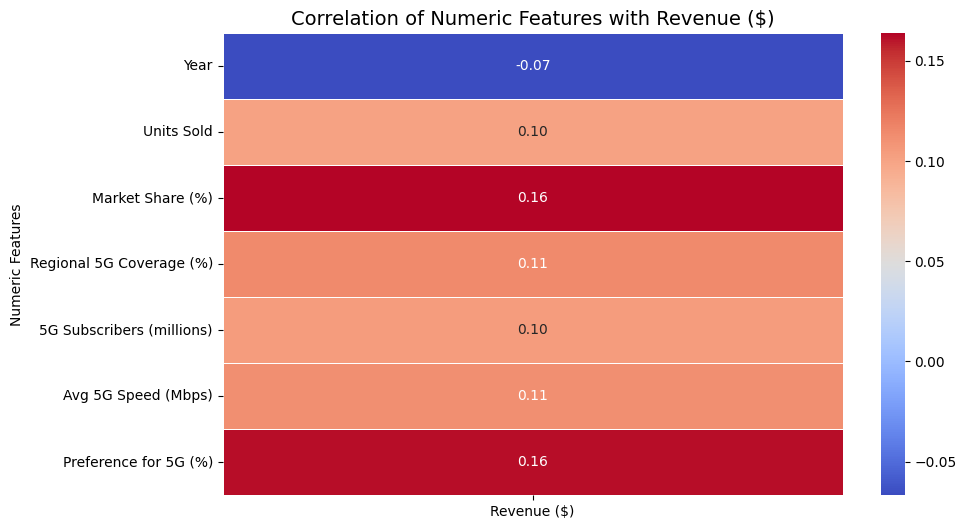

In [33]:
# Correlation matrix visualization for numeric variables with target variable "Revenue ($)"
plt.figure(figsize=(10, 6))
correlation_matrix = df[num_col].corr()
sns.heatmap(correlation_matrix[['Revenue ($)']].drop('Revenue ($)', axis=0),
            annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation of Numeric Features with Revenue ($)", fontsize=14)
plt.ylabel("Numeric Features")
plt.show()

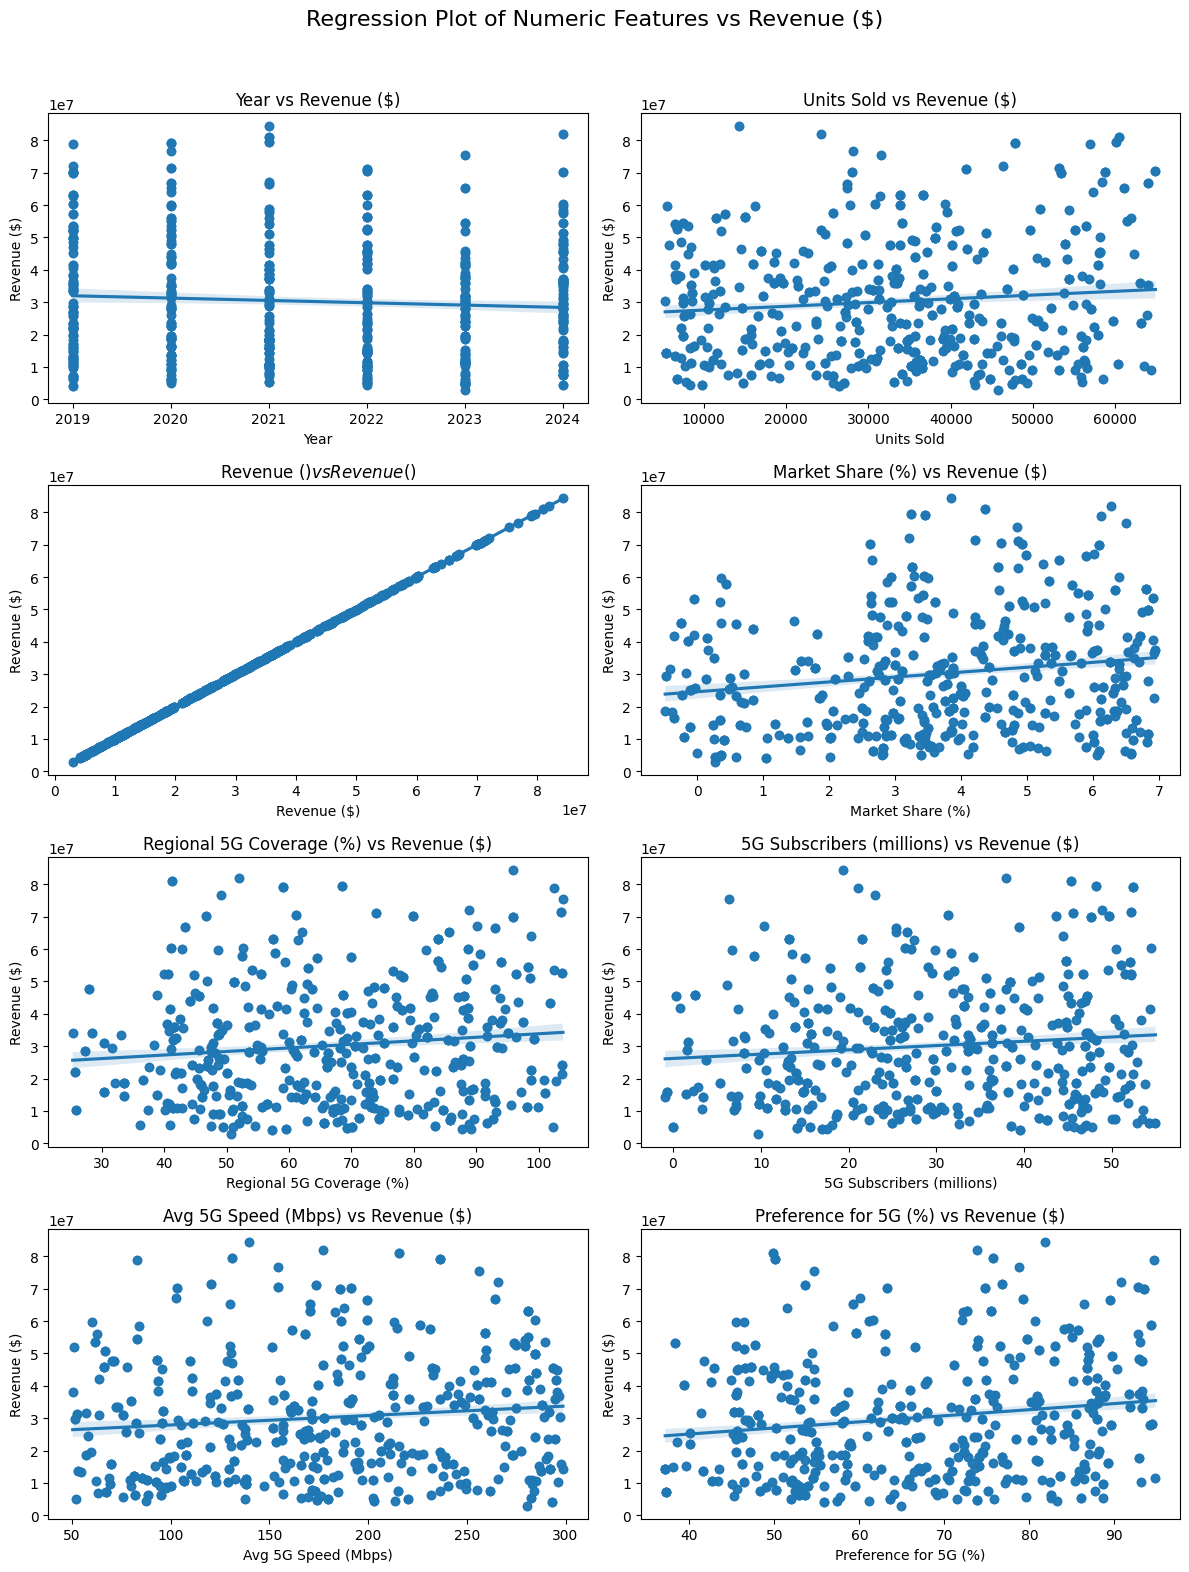

In [34]:
# regplot visualization for numeric features vs. Revenue ($)
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle("Regression Plot of Numeric Features vs Revenue ($)", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.regplot(x=df[col], y=df["Revenue ($)"], ax=axes[i])
    axes[i].set_title(f"{col} vs Revenue ($)", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Revenue ($)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

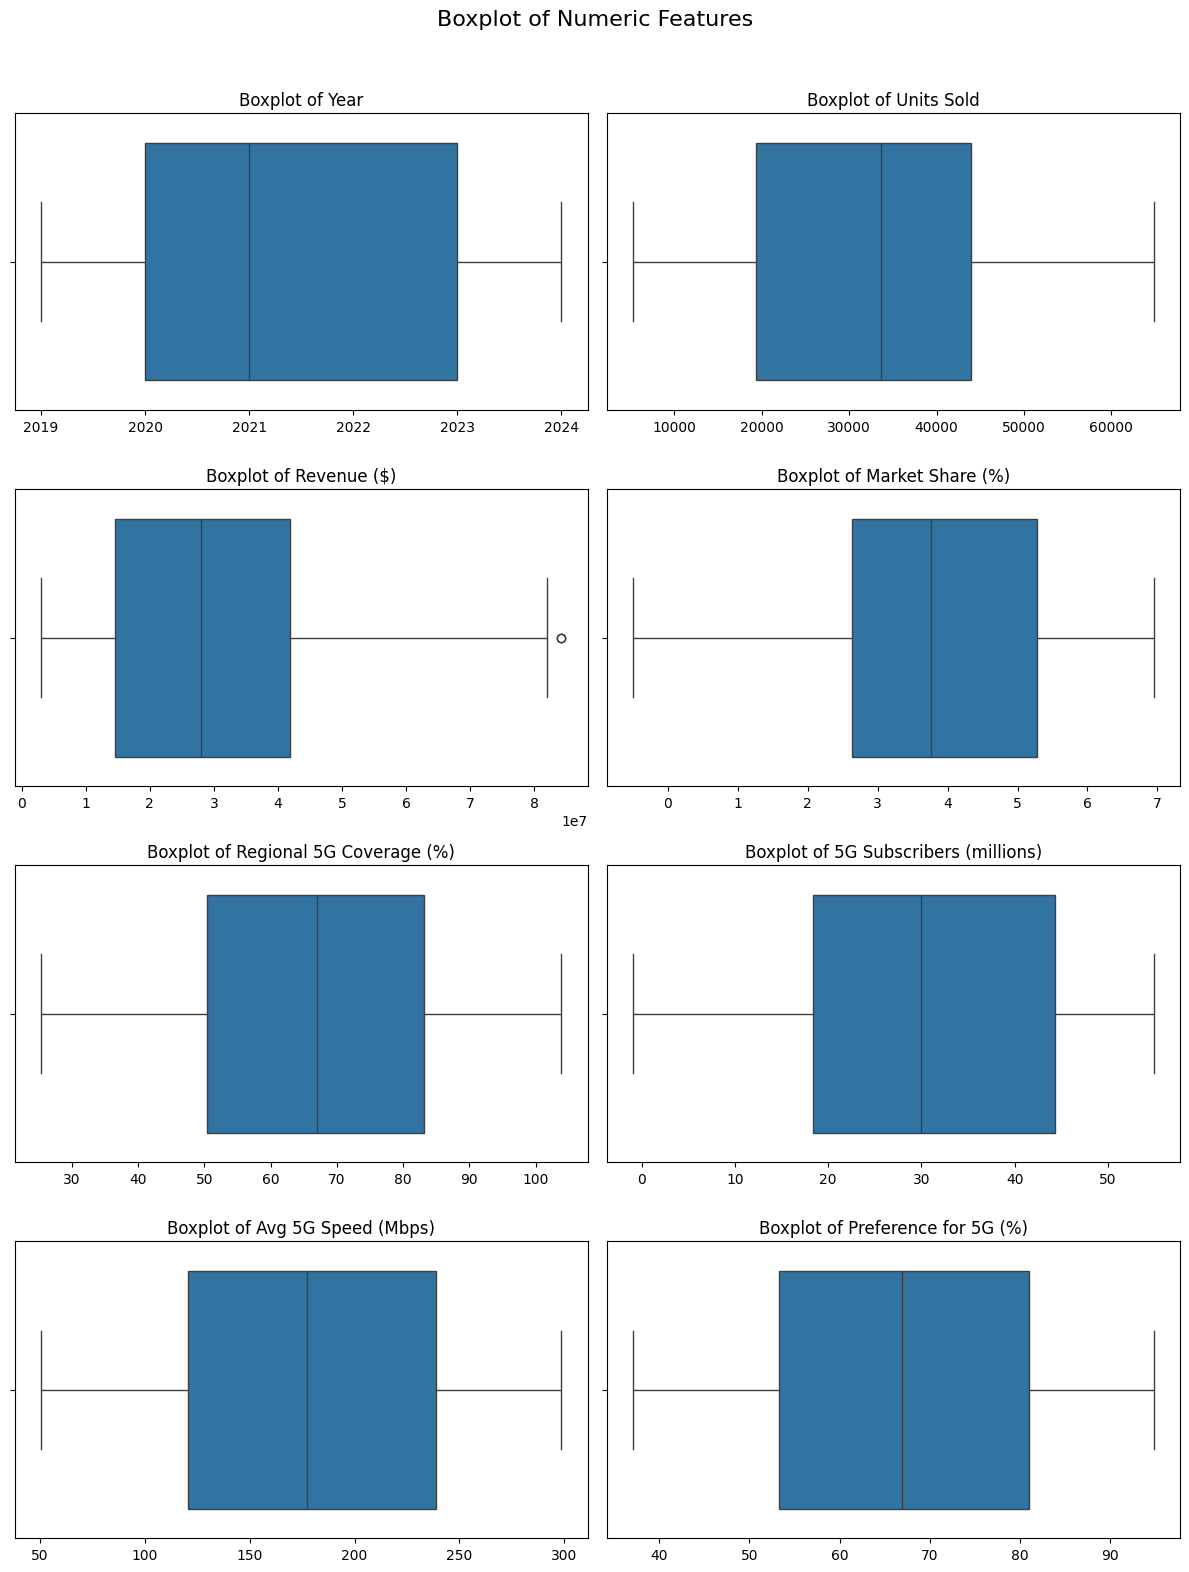

In [35]:
# Boxplot visualization for outliers using 4x2 subplot layout
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
fig.suptitle("Boxplot of Numeric Features", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=12)
    axes[i].set_xlabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Summary & Observations

Among the 4 categorical variables, only the variable named Product Model has high cardinality and the other 3 categorical variables do not have high cardinality.

Among the categorical variables, 5G Capability and Product Model were found to be effective on the target variable Revenue.

The fact that the numerical variables do not have a normal distribution can be seen both from the graphs and the shapiro test.

Among the numerical variables, there is no variable with a strong negative or positive correlation with the target variable.

No outlier observations were detected in numerical variables.

In [37]:
X = df.copy()
y = X.pop("Revenue ($)")

In [38]:
# train-validation split
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 0)

In [39]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(750, 11)
(250, 11)
(750,)
(250,)


In [40]:
num_col.remove('Revenue ($)')
num_col

['Year',
 'Units Sold',
 'Market Share (%)',
 'Regional 5G Coverage (%)',
 '5G Subscribers (millions)',
 'Avg 5G Speed (Mbps)',
 'Preference for 5G (%)']

In [41]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_col),
        ('cat', categorical_transformer, object_col)
    ]
)

In [42]:
# Models and hyperparameter grids
models = {
    'RandomForest': (RandomForestRegressor(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20]}),
    'DecisionTree': (DecisionTreeRegressor(), {'model__max_depth': [None, 10, 20]}),
    'XGBoost': (XGBRegressor(), {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 6, 9]}),
    'LinearRegression': (LinearRegression(), {})
}

In [43]:
# Store results
results = []

# Train and evaluate models
for name, (model, param_grid) in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)

    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    results.append({'Model': name, 'R2 Score': r2, 'MAE': mae})

In [44]:
# Convert results to dataframe
results_df = pd.DataFrame(results)
results_df

,Model,R2 Score,MAE
0,RandomForest,0.763576,5.334738e+06
1,DecisionTree,0.824671,2.002111e+06
2,XGBoost,0.833001,1.938184e+06
3,LinearRegression,-0.017217,1.461269e+07


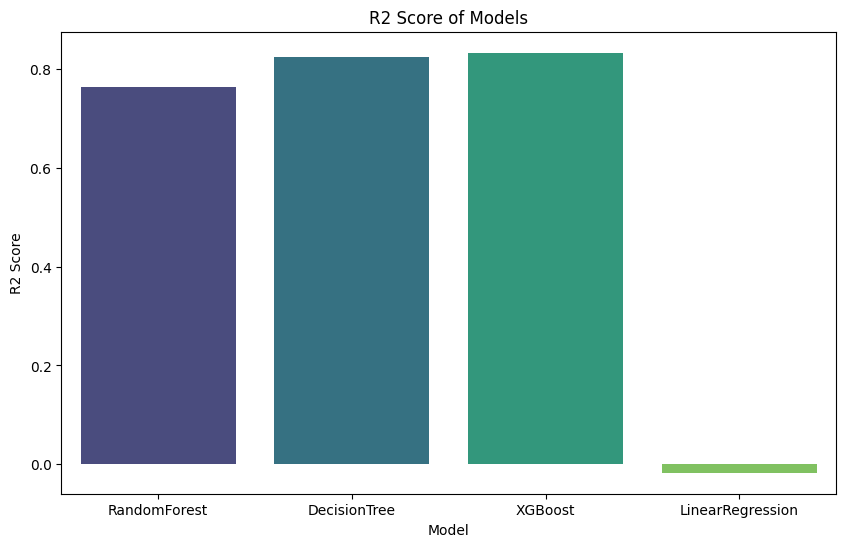

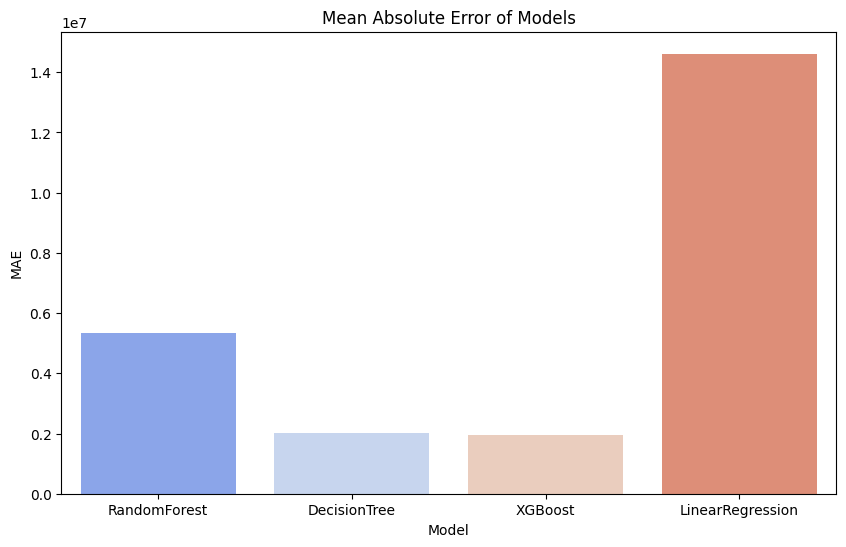

In [45]:
# Visualize model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', data=results_df, palette='viridis')
plt.title('R2 Score of Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=results_df, palette='coolwarm')
plt.title('Mean Absolute Error of Models')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

 # Summary & Observations
When we interpreted the model results, we saw that the best MAE and
R2 scores were obtained with the decisiontree model. Indeed,
the small number of samples in the dataset also shows that the decision tree model